<a href="https://colab.research.google.com/github/MennaEwas/Stock-Market-prediction-and-forcasting/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Name: Stock Market prediction and forcasting
##By: MennaTullah Abdelrahman

###Importing Libraries

In [ ]:
import pandas_datareader as pdr
import pandas as pd


In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
#pick up the close colomn 
df1=df.reset_index()['Close']
df1.shape #it is an attribute not a method
print(df1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


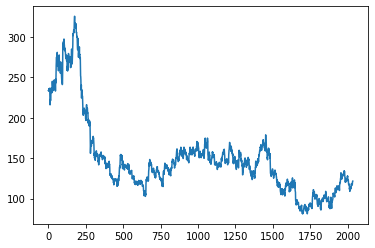

In [ ]:
from matplotlib import pyplot as plt
#plotting close col
plt.plot(df1) 

In [ ]:
#LSTM is sensitive to the scale so we usin MinMax
import numpy as np 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))
#df1.shape
#print(df1)

###Splitting data into Train and Testing

In [ ]:
#it is a timeseries data 
#Splitting data as 65% training and 35% testing
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size #or make it the same ways by 0.35 
train, test = df1[0:train_size,:], df1[train_size:len(df1), :1]  #Train_data and Test_data

In [ ]:
import numpy 

def create_ds(dataset, step = 1): 
  datax, datay = [],[]
  for i in range(len(dataset)-step-1):
    arr = dataset[i:(i + step), 0] #2d graph because of the step = 1
    datax.append(arr)
    datay.append(dataset[i + step, 0]) 
  return numpy.array(datax), numpy.array(datay)

###Create an stacked LSTM Model 

In [ ]:
#create x_train and y_train using the last function 
x_train, y_train = create_ds(train, 100)
x_test, y_test = create_ds(train, 100)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
#importing the libraries we need 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100, 1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Recurrence, validation means test
model.fit(x_train, y_train , validation_data = (x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 10s 271ms/step - loss: 0.0191 - val_loss: 0.0047
Epoch 2/100
20/20 [==============================] - 4s 213ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 3/100
20/20 [==============================] - 4s 211ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 4/100
20/20 [==============================] - 4s 210ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/100
20/20 [==============================] - 4s 212ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/100
20/20 [==============================] - 4s 209ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 4s 209ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 4s 212ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 4s 212ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 4s 212ms/step - loss: 0.0011 - val_l

###Predict the test data

In [ ]:
train_predict = model.predict(x_train) #get y 
test_predict = model.predict(x_test) #get y 

In [ ]:
import tensorflow as tf

In [ ]:
train_predict=sc.inverse_transform(train_predict).sum(axis = 1)
test_predict= sc.inverse_transform(test_predict).sum(axis = 1)
#This is the reverse scalar 

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) 

165.121635272056

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

165.121635272056

In [ ]:
#plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,0] = train_predict


In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
#testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

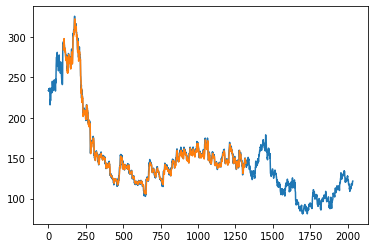

In [ ]:
# plot baseline and predictions
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input


[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [ ]:
from numpy import array

lst_output=[]
n_steps=372
i=0
while(i<30):
    
    if(len(temp_input)>372):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04881536 0.05310458 0.04963235 0.05065359 0.05126634 0.04963235
 0.05902778 0.05555556 0.04084967 0.03737745 0.03737745 0.02655229
 0.02879902 0.0316585  0.0316585  0.03635621 0.02205882 0.01674837
 0.01450163 0.02226307 0.03615196 0.02675654 0.03206699 0.02696078
 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765 0.02982026
 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232  0.
 0.00714869 0.00428922 0.0067402  0.0063317  0.01123366 0.01960784
 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967 0.03982843
 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052 0.02410131
 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078 0.03819444
 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935 0.00653595
 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359 0.02246732
 0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2035

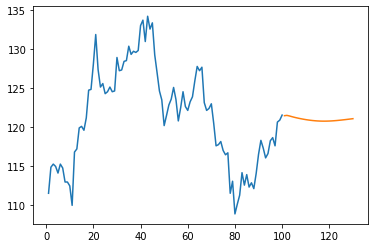

In [ ]:
plt.plot(day_new,sc.inverse_transform(df1[1935:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

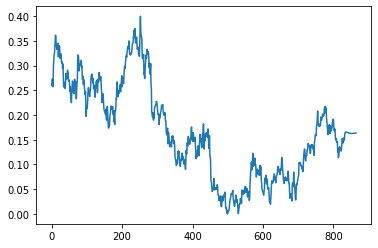

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=sc.inverse_transform(df3).tolist()

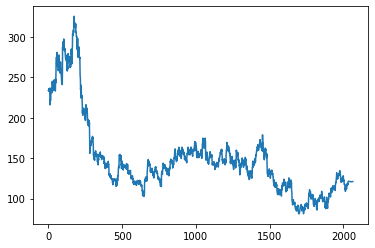

In [ ]:
plt.plot(df3)